Import all necessary libraries and functions, as well as the primary data-structure

In [1]:
# This builds the full data-structure, including
# 1. initial parameter and covariate sets
# 2. pre-processing settings and additional parameters-induced changes to data

%run fMRI_prestats_data-struct.ipynb

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


subject(s) missing!
First line of list-alignment:   FED006 FED006 FED007
Control relevant files!


 The following subjects where excluded from further analysis due to false file numbers or missing data:  
 EPI:  ['FED006'] T1:  ['FED006']
The new subject list after initial data and image file checkup:

['FED007', 'FED008', 'FED009', 'FED010', 'FED011', 'FED012', 'FED013', 'FED014', 'FED015', 'FED016', 'FED017', 'FED018', 'FED019', 'FED020', 'FED021', 'FED022', 'FED023', 'FED024', 'FED025', 'FED026', 'FED027', 'FED028', 'FED029', 'FED030', 'FED031', 'FED032', 'FED033', 'FED034', 'FED035', 'FED036', 'FED037', 'FED038', 'FED039', 'FED040', 'FED041', 'FED042', 'FED043', 'FED044', 'FED045', 'FED046', 'FED047', 'FED048', 'FED049', 'FED050', 'FED051', 'FED052', 'FED053', 'FED054', 'FED055', 'FED056', 'FED057', 'FED058', 'FED059', 'FED060', 'FED061', 'FED062', 'FED063', 'FED064', 'FED065', 'FED066', 'FED067', 'FED068']


That leaves a total of  62 remaining subjects.


The following parameters

In [2]:
# Delete all variables in the current namespace from globals except those defined at the initiation of the data structure
for var in dir():
    if (var != 'data_varspace_init' and var not in data_varspace_init):
        #print(var, " will be deleted from this notebook's global namespace")
        del globals()[var]

In [3]:
# control results
key = random.sample(data.keys(), 1)
print(data[key[0]])
print(data["general"])

{'files': ['/fMRI/FED020/FMRI.json', '/fMRI/FED020/FMRI.nii.gz', '/fMRI/FED020/FMRI_mc-bet-cr-s10.nii.gz', '/fMRI/FED020/FMRI_mc-bet-cr-s10.nii.gz_usan_size.nii.gz', '/fMRI/FED020/FMRI_mc-bet-cr-s9-m.nii', '/fMRI/FED020/FMRI_mc-bet-cr-s9.nii.gz', '/fMRI/FED020/FMRI_mc-bet-cr-s9.nii.gz_usan_size.nii.gz', '/fMRI/FED020/FMRI_mc-bet-cr.nii.gz', '/fMRI/FED020/FMRI_mc-bet-cr_mean.nii.gz', '/fMRI/FED020/FMRI_mc-bet.nii.gz', '/fMRI/FED020/FMRI_mc.nii.gz', '/fMRI/FED020/FMRI_mc_mask.nii.gz', '/fMRI/FED020/FMRI_mc_mean.nii.gz', '/fMRI/FED020/FMRI_mc_overlay.nii.gz', '/fMRI/FED020/GM_cr_mask.nii.gz', '/fMRI/FED020/GM_cr_wholebrain.nii.gz', '/fMRI/FED020/T1_BETBf35.nii', '/fMRI/FED020/T1_BETBf35_mask.nii', '/fMRI/FED020/T1_BETBf35_overlay.nii', '/fMRI/FED020/T1_GM-tpm_mask.nii.gz', '/fMRI/FED020/T1_MPRAGE.json', '/fMRI/FED020/T1_MPRAGE.nii.gz', '/fMRI/FED020/T1_WM-tpm_mask.nii.gz', '/VBM/FED020/DARTEL_newsegment/c1CON_FED020_T1_MPRAGE_SAG_ISO_0_9_0005_20141210170232.nii', '/VBM/FED020/DARTEL_newse

 Pre-configurations

In [4]:
# (Re-)activate nipype's INFO output for interfaces and workflows , as we want to see what's going on
logging.getLogger('nipype.interface').setLevel("INFO")
logging.getLogger('nipype.workflow').setLevel("INFO")

In [5]:
# set default data ouput for all FSL operations
fsl.FSLCommand.set_default_output_type('NIFTI_GZ')

In [6]:
# define additional directories and files
spm_mnitpm = f"{tpmdir}TPM.nii"
fsl_mni = f"{fsldir}data/standard/MNI152_T1_2mm_brain_mask.nii.gz"

Custom functions

In [7]:
# write function to iterate over lists in adjoining pairs within the Harvard Oxford atlas
def pairwise(iterable):
    "s -> (s0, s1), (s2, s3), (s4, s5)..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

Template modelling

In [21]:
# Harvard Oxford atlas for suitability and fit to hypotheses
harox_cort = datasets.fetch_atlas_harvard_oxford("cort-prob-2mm", data_dir=None, symmetric_split=False, resume=True, verbose=1)
harox_sub = datasets.fetch_atlas_harvard_oxford("sub-prob-2mm", data_dir=None, symmetric_split=False, resume=True, verbose=1)

# list of label indexing starts at 1! 0/Background is not conform with images, regional indexing starts at 0^^


Dataset created in /home/martin/nilearn_data/fsl



Downloaded 24977408 of 25716861 bytes (97.1%,    0.7s remaining) ...done. (24 seconds, 0 min)
Extracting data from /home/martin/nilearn_data/fsl/e84ad0263d578b399912ab057c50aa50/HarvardOxford.tgz..... done.


Available cortical regions via the Harvard-Oxford probabilistic atlas: 
 ['Background', 'Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, temporooccipital part', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, temporooccipital part', 'Postcentral Gyrus', 'Superior Parietal Lobule', 'Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Angular Gyrus', 'Lateral Occipital Cortex, superior division', 'Lateral Occipital Cortex, inferior division', 'Intracalcarine Cortex', 'Frontal Medial Cortex', 'Juxtapositional Lobule Cortex (fo

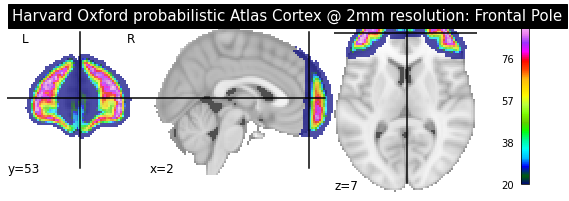

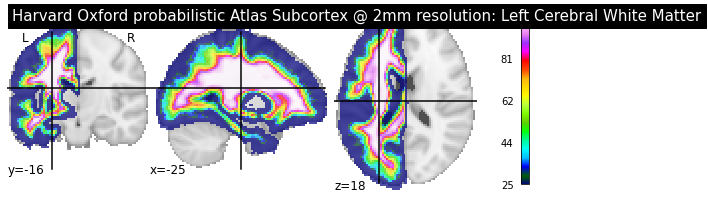

In [15]:
# print a list of available regions in two atlases
print("Available cortical regions via the Harvard-Oxford probabilistic atlas: \n", harox_cort.labels, len(harox_cort.labels))
print("\nAvailable subcortical regions via the Harvard-Oxford probabilistic atlas: \n", harox_sub.labels, len(harox_sub.labels))


# print thresholded cortical testregion (thresholding visually optimised^^)
for label in range(0, nb.load(harox_cort.maps).shape[-1] - 47):
    ni_plt.plot_roi(ni_img.index_img(harox_cort.maps, label),
                    title=f"Harvard Oxford probabilistic Atlas Cortex @ 2mm resolution: {harox_cort.labels[label+1]}", colorbar=True, vmin=20)

# print thresholded subcortical testregion (thresholding visually optimised^^)
for label in range(0, nb.load(harox_sub.maps).shape[-1] - 20):
    ni_plt.plot_roi(ni_img.index_img(harox_sub.maps, label),
                    title=f"Harvard Oxford probabilistic Atlas Subcortex @ 2mm resolution: {harox_sub.labels[label+1]}", colorbar=True, vmin=25)

In [22]:
# separate FSL's tissue propability maps Harvard_Oxford into distinct anatomical ROIs
# create dict for all ROIs and their labels
ROIs = {}

# identify important labels and collect them for each ROI by going through label-list and the Atlas image in parallel
cort_labels = [label for label in harox_cort.labels
               if re.match(r'.*(Frontal(?! Medial)|Cingulate.*anterior|Paracingulate|(?<!Planum )Temporal(?!(.*occipital|.*Fusiform))|Insula|hippocampal).*', label)]
sub_labels = [label for label in harox_sub.labels
              if re.match(r'.*(Hippo|Amygd).*', label)]

# subcortical areas are often split into left and right
# sort them by region
sub_labels = sorted([val for val in sub_labels], key=lambda val: val.split(' ', 1)[1])
# put them into tuples for later combination
sub_labels_paired = [[left, right] for left, right in pairwise(sub_labels) if left.split(' ', 1)[1] == right.split(' ', 1)[1]]
# create coherent list from items
sub_labels = [side for pair in sub_labels_paired for side in pair]
# define full list of labels, containing all relevant rois
full_labels = cort_labels + sub_labels

# control the outcome of the labelling collection
print(f"cortical labels:\n{cort_labels}\n{len(cort_labels)} labels in total\n",
      f"subcortical labels:\n{sub_labels}\n{len(sub_labels)} labels in total\n")

# associate ROIs in map object with correct labels -> into dict
for label in cort_labels:
    ROIs[label] = ni_img.index_img(harox_cort.maps, harox_cort.labels.index(label)-1)

for label in sub_labels:
    ROIs[label] = ni_img.index_img(harox_sub.maps, harox_sub.labels.index(label)-1)

# combine subcortical rois across both hemispheres (if split) into one mask image
for pair in sub_labels_paired:
    # access dict, add rois together and create new entry
    ROIs[pair[0].split(' ', 1)[1]] = ni_img.math_img('np.sum((img1, img2), axis=0)', img1=ROIs[pair[0]], img2=ROIs[pair[1]])

# drop the lateralised entries from the ROIs dict
lateral_labels = [roi for roi in full_labels if re.match(r'.*(left|right).*', roi, re.IGNORECASE)]
[ROIs.pop(roi) for roi in lateral_labels]

# combine all ROIs into one mask image
ROIs['Full_ROI_mask'] = ni_img.math_img('np.sum((allrois), axis=3)', allrois=ROIs.values())

# threshold probability images by respective value
for key in ROIs.keys():
    if key in cort_labels:
        ni_img.threshold_img(ROIs[key], 20)
    elif key in sub_labels:
        ni_img.threshold_img(ROIs[key], 25)
    # for the full mask
    else:
        ni_img.threshold_img(ROIs[key], 20)

# re-define full_labels
full_labels = [label for label in ROIs.keys()]

# binarise probability images to create masks for group analysis - for each area seperately and for the overall mask
for key in full_labels:
    ROIs[key] = ni_img.math_img('np.where(image > 0, 1, 0)', image=ROIs[key])

# save ROI masks to nii(.gz) file format
for roi in ROIs.keys():
    # also, get rid of whitespace in filenames
    group_roi_file = f"{basedir}MNI_templates/{roi.replace(' ', '-').replace(',', '')}_group.nii.gz"
    nb.save(ROIs[roi], group_roi_file)

cortical labels:
['Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Paracingulate Gyrus', 'Cingulate Gyrus, anterior division', 'Frontal Orbital Cortex', 'Parahippocampal Gyrus, anterior division', 'Parahippocampal Gyrus, posterior division', 'Frontal Operculum Cortex']
19 labels in total
 subcortical labels:
['Left Amygdala', 'Right Amygdala', 'Left Hippocampus', 'Right Hippocampus']
4 labels in total



In [23]:
# Andrew Jahn "ROI Analysis" - ROIs decide significance: Try Seitzman et al (2018) for suitability and fit to hypotheses
seitzman_rois = datasets.fetch_coords_seitzman_2018(ordered_regions=True)
# # lose the description item
# seitzman_rois.pop("description")

# all lists have the same length as the "rois" list; ROIs are represented as coordinate-arrays;
# each ROI has an entry for radius, networks and regions -> so it's al resolved down to region level^^

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [20]:
# print a list of available networks (want to use (subregions of) emotion and attention networks) in the atlas
print("Available networks via the Seitzman ROI atlas: \n", set(seitzman_rois.networks), f"\n{len(set(seitzman_rois.networks))} in total")
print("\nAvailable regions via the Seitzman ROI atlas: \n", set(seitzman_rois.regions), f"\n{len(set(seitzman_rois.regions))} in total")

# # print thresholded spherical ROIs on MNI template image for the first network in the list
# for network in networks_unique[0:1]:
#     # go through coupled lists and select by the network ID/name
#     for roi, rad, region, net_id in zip(seitzman_rois.rois, seitzman_rois.radius, seitzman_rois.regions, seitzman_rois.networks):
#         if net_id == network:
#             ni_plt.plot_roi(fsl_mni, cut_coords=roi,
#                             title=f"Seitzman ROI atlas (on MNI) coordinates of the {region} in the {net_id} network", colorbar=True)

Available networks via the Seitzman ROI atlas: 
 {'Visual', 'MedialTemporalLobe', 'VentralAttention', 'Auditory', 'ParietoMedial', 'FrontoParietal', 'Reward', 'Salience', 'SomatomotorLateral', 'SomatomotorDorsal', 'DefaultMode', 'CinguloOpercular', 'DorsalAttention', 'unassigned'} 
14 in total

Available regions via the Seitzman ROI atlas: 
 {'cortexMid', 'hippocampus', 'amygdala', 'cerebellum', 'thalamus', 'basalGanglia', 'cortexL', 'cortexR'} 
8 in total


In [24]:
# separate the Seitzman ROI atlas into distinct network ROIs
# get unique network and region values from seitzman ROI atlas
networks_unique = [ID for ID in set(seitzman_rois.networks)]
regions_unique = [reg for reg in set(seitzman_rois.regions)]

# create dict for all ROIs and their labels
ROIs = {}

# select the FPN, D/VAN and SN to be examined
networks_koster = [ID for ID in networks_unique if re.match(r'.*(Attention|Salience|Front.*Par).*', ID)]

# associate ROIs in with correct regions and networks -> into dict
for network in networks_koster:
    # create lists to collect relevant ROIs and regions per network
    ROIs[network] = {}
    ROIs[network]["spheres"] = []
    ROIs[network]["regions"] = []
    # loop over all parameters and assign the relevant items to the relevant network key
    for roi, rad, region, net_id in zip(seitzman_rois.rois, seitzman_rois.radius, seitzman_rois.regions, seitzman_rois.networks):
        if net_id == network:
            roi_sphere = nl_mask.create_sphere(roi, radius=rad, mask=fsl_mni)  # warning looked-at - irrelevant in this case^^
            ROIs[network]["spheres"].append(roi_sphere)
            ROIs[network]["regions"].append(region)

# combine ROIs across each network into one mask image
for network in ROIs.keys():
     ROIs[network]["network_mask"] = ni_img.math_img('np.sum((spheres), axis=3)', spheres=ROIs[network]["spheres"])

# # control the resulting mask images
# for network in ROIs.keys():
#     ni_plt.plot_roi(ROIs[network]["network_mask"],
#                     title=f"Seitzman ROI atlas (on MNI): Sphere-collection from all seeds/ROIs of the {network} network")

# save ROI masks to nii(.gz) file format
for network in ROIs.keys():
    group_roi_file = f"{basedir}MNI_templates/{network}_nw_group.nii.gz"
    nb.save(ROIs[network]["network_mask"], group_roi_file)

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/opt/mi

# 1st-level modelling

In [18]:
# define input files
prepped_funcs = sorted([i for sub in FEDs
                        for i in data[sub]["files"]
                        if re.match(r'.*(FMRI).*(?<=-s9-m).nii.gz$', i)])

# control presence and accuracy of preprocessed files
print("\nnumber of preprocessed files:\n", len(prepped_funcs))
print("\nnumber of subject directories:\n", len(FED_dirs))


number of preprocessed files:
 61

number of subject directories:
 61


In [20]:
%%script env FUNCS="$prepped_funcs" bash
# transfer functionals to bash array and get rid of pythonean list/string characters
FUNCS_arr=($(echo $FUNCS | sed -e 's/[][]//g' -e 's/,//g' -e "s/'//g"))

# gzip each functional file
for file in "${FUNCS_arr[@]}"; do
gunzip $file
done

In [ ]:
# update files for all subs
update_files(collect_files())

In [9]:
# collect the unzipped functionals for processing with SPM
prepped_funcs = sorted([i for sub in FEDs
                        for i in data[sub]["files"]
                        if re.match(r'.*(FMRI).*(?<=-s9-m).nii$', i)])

# control presence and accuracy of preprocessed files
print("\nnumber of preprocessed files:\n", len(prepped_funcs))
print("\nnumber of subject directories:\n", len(FED_dirs))


number of preprocessed files:
 61

number of subject directories:
 61


Specify the model parameters for the SPM model

In [10]:
# specify the design information and the model
for func, sub, subdir in zip(prepped_funcs, FEDs, FED_dirs):
    print(func, sub, subdir)  # for some reason, the print throws errors if you don't help it focus^^
    # define artdetect directory
    art_dir = f"{subdir}artdetect/"
    modelspec = pe.Node(model.SpecifySPMModel(), name="model_specifications")
    modelspec.inputs.input_units = 'secs'
    modelspec.inputs.output_units = 'secs'
    modelspec.inputs.functional_runs = func
    modelspec.inputs.time_repetition = data[sub]["parameters"]["EPI_RT"]
    modelspec.inputs.high_pass_filter_cutoff = 128  # SPM default -> makes about 71 volumes at TR = 1.8
    modelspec.inputs.subject_info = data[sub]["parameters"]["trialinfo"]
    modelspec.inputs.realignment_parameters = f"{subdir}FMRI_mc.nii.gz.par"  # first run with, but see if removing them might be better later
    modelspec.inputs.outlier_files = f"{art_dir}art.FMRI_mc_outliers.txt"
    modelspec.inputs.parameter_source = "FSL"
    modelspec.base_dir = subdir
    # run it
    res = modelspec.run()

/fMRI/FED007/FMRI_mc-bet-cr-s9-m.nii FED007 /fMRI/FED007/
210426-08:26:44,426 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED007/model_specifications".
210426-08:26:44,437 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:44,470 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED008/FMRI_mc-bet-cr-s9-m.nii FED008 /fMRI/FED008/
210426-08:26:44,472 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED008/model_specifications".
210426-08:26:44,480 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:44,522 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED009/FMRI_mc-bet-cr-s9-m.nii FED009 /fMRI/FED009/
210426-08:26:44,526 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED009/model_specifications".
210426-08:26:44,537 nipyp

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nipype/algorithms/modelgen.py:491: UserWarning: loadtxt: Empty input file: "/fMRI/FED007/model_specifications/art.FMRI_mc_outliers.txt"
  outindices = np.loadtxt(filename, dtype=int)


210426-08:26:44,685 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED012/FMRI_mc-bet-cr-s9-m.nii FED012 /fMRI/FED012/
210426-08:26:44,687 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED012/model_specifications".
210426-08:26:44,698 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:44,737 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED013/FMRI_mc-bet-cr-s9-m.nii FED013 /fMRI/FED013/
210426-08:26:44,739 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED013/model_specifications".
210426-08:26:44,748 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:44,786 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED014/FMRI_mc-bet-cr-s9-m.nii FED014 /fMRI/FED014/
210426-08:26:44,788 nipype.workflow INFO:
	 [Node] Setting-up "mod

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nipype/algorithms/modelgen.py:491: UserWarning: loadtxt: Empty input file: "/fMRI/FED025/model_specifications/art.FMRI_mc_outliers.txt"
  outindices = np.loadtxt(filename, dtype=int)
/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nipype/algorithms/modelgen.py:491: UserWarning: loadtxt: Empty input file: "/fMRI/FED028/model_specifications/art.FMRI_mc_outliers.txt"
  outindices = np.loadtxt(filename, dtype=int)


210426-08:26:45,543 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED030/FMRI_mc-bet-cr-s9-m.nii FED030 /fMRI/FED030/
210426-08:26:45,545 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED030/model_specifications".
210426-08:26:45,551 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:45,585 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED031/FMRI_mc-bet-cr-s9-m.nii FED031 /fMRI/FED031/
210426-08:26:45,587 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED031/model_specifications".
210426-08:26:45,595 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:45,631 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED032/FMRI_mc-bet-cr-s9-m.nii FED032 /fMRI/FED032/
210426-08:26:45,632 nipype.workflow INFO:
	 [Node] Setting-up "mod

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nipype/algorithms/modelgen.py:491: UserWarning: loadtxt: Empty input file: "/fMRI/FED039/model_specifications/art.FMRI_mc_outliers.txt"
  outindices = np.loadtxt(filename, dtype=int)


210426-08:26:46,175 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED045/FMRI_mc-bet-cr-s9-m.nii FED045 /fMRI/FED045/
210426-08:26:46,177 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED045/model_specifications".
210426-08:26:46,183 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:46,220 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED046/FMRI_mc-bet-cr-s9-m.nii FED046 /fMRI/FED046/
210426-08:26:46,223 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED046/model_specifications".
210426-08:26:46,228 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:46,257 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED047/FMRI_mc-bet-cr-s9-m.nii FED047 /fMRI/FED047/
210426-08:26:46,260 nipype.workflow INFO:
	 [Node] Setting-up "mod

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nipype/algorithms/modelgen.py:491: UserWarning: loadtxt: Empty input file: "/fMRI/FED047/model_specifications/art.FMRI_mc_outliers.txt"
  outindices = np.loadtxt(filename, dtype=int)


210426-08:26:46,475 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:46,516 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED054/FMRI_mc-bet-cr-s9-m.nii FED054 /fMRI/FED054/
210426-08:26:46,517 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED054/model_specifications".
210426-08:26:46,524 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:46,561 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED055/FMRI_mc-bet-cr-s9-m.nii FED055 /fMRI/FED055/
210426-08:26:46,563 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED055/model_specifications".
210426-08:26:46,569 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifySPMModel")
210426-08:26:46,619 nipype.workflow INFO:
	 [Node] Finished "model_specificatio

Create the design .mat file

In [11]:
# use the design specifications to create an SPM 1st level design .mat file
for sub, subdir in zip(FEDs, FED_dirs):
    # define model directory
    model_dir = f"{subdir}model_specifications/"
    modelinfo = loadpkl(f"{model_dir}result_model_specifications.pklz")
    #print(modelinfo.outputs.session_info)
    # create SPM level1design
    level1design = pe.Node(spm.Level1Design(), name = "level1design")
    level1design.inputs.interscan_interval = data[sub]["parameters"]["EPI_RT"]
    level1design.inputs.bases = {'hrf': {'derivs': [1, 0]}}
    level1design.inputs.timing_units = 'secs'
    level1design.inputs.session_info = modelinfo.outputs.session_info
    level1design.inputs.global_intensity_normalization = 'scaling'  # consider https://www.ernohermans.com/wp-content/uploads/2016/09/spm12_startersguide.pdf for a thorough think ..
    level1design.inputs.model_serial_correlations = 'AR(1)'
    #level1design.inputs.spm_mat_dir = model_dir
    level1design.base_dir = model_dir
    #   levlevel1design.inputs.volterra_expansion_order = 2
    # look at https://www.fil.ion.ucl.ac.uk/spm/course/slides02/overview/Connect.html on how the above may model effective connectivity
    # run it
    res = level1design.run()
    # print it
    print(res.outputs)

210426-08:27:00,196 nipype.workflow INFO:
	 [Node] Setting-up "level1design" in "/fMRI/FED007/model_specifications/level1design".
210426-08:27:00,255 nipype.workflow INFO:
	 [Node] Running "level1design" ("nipype.interfaces.spm.model.Level1Design")
210426-08:27:07,995 nipype.workflow INFO:
	 [Node] Finished "level1design".

spm_mat_file = /fMRI/FED007/model_specifications/level1design/SPM.mat

210426-08:27:08,1 nipype.workflow INFO:
	 [Node] Setting-up "level1design" in "/fMRI/FED008/model_specifications/level1design".
210426-08:27:08,78 nipype.workflow INFO:
	 [Node] Running "level1design" ("nipype.interfaces.spm.model.Level1Design")
210426-08:27:16,33 nipype.workflow INFO:
	 [Node] Finished "level1design".

spm_mat_file = /fMRI/FED008/model_specifications/level1design/SPM.mat

210426-08:27:16,39 nipype.workflow INFO:
	 [Node] Setting-up "level1design" in "/fMRI/FED009/model_specifications/level1design".
210426-08:27:16,97 nipype.workflow INFO:
	 [Node] Running "level1design" ("nipype

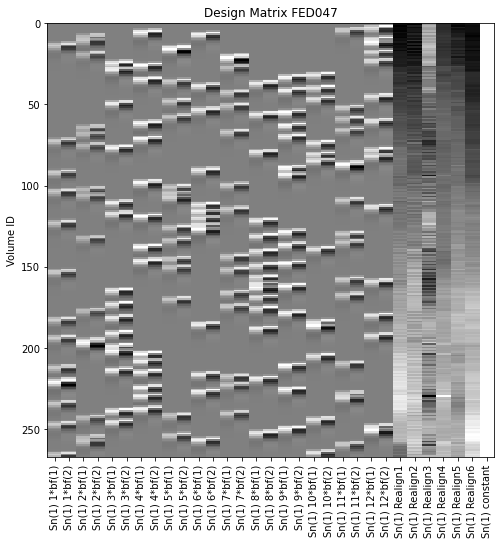

In [24]:
# print a few example design matrices to make sure everything looks alright
# Access SPM.mat via loadmat function
for subdir in FED_dirs[40:41]:
    spmmat = sp.io.loadmat(f"{subdir}model_specifications/level1design/SPM.mat",
                       struct_as_record=False)
    # Design matrix and the names of the regressors are hidden in the spmmat variable, but they can be accessed as follows
    designMatrix = spmmat['SPM'][0][0].xX[0][0].X
    names = [i[0] for i in spmmat['SPM'][0][0].xX[0][0].name[0]]
    # Normalize the design matrix, so that each column has a maximum amplitude of 1.
    # This is just for visualization purposes, otherwise rotation parameters with their rather small values will not show up.
    normed_design = designMatrix / np.abs(designMatrix).max(axis=0)
    # Plot the design matrix.
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.imshow(normed_design, aspect='auto', cmap='gray', interpolation='none')
    plt.title(f"Design Matrix {subdir.rsplit('/', 2)[1]}")
    ax.set_ylabel('Volume ID')
    ax.set_xticks(np.arange(len(names)))
    ax.set_xticklabels(names, rotation=90);  # semicolon suppresses unwanted text-output from "set*" commands

Estimate the 1st level SPM model

In [21]:
# estimate the 1st level design using restricted Maximum Likelihood (the "Classical" approach ^^)
# define input files
spmmats = sorted([os.path.join(f"{sub}model_specifications/level1design/", i)
                  for sub in FED_dirs
                  for i in os.listdir(f"{sub}model_specifications/level1design/")
                  if re.match(r'.*SPM.mat$', i)])

for mat in spmmats:
    level1estimate = pe.Node(spm.EstimateModel(), name = "mod_estimate")
    level1estimate.inputs.estimation_method = {'Classical': 1}
    level1estimate.inputs.spm_mat_file = mat
    level1estimate.base_dir = mat.rsplit('/', 1)[0]
    # run it
    res = level1estimate.run()
    # print it
    print(res.outputs)

210426-08:58:10,421 nipype.workflow INFO:
	 [Node] Setting-up "mod_estimate" in "/fMRI/FED007/model_specifications/level1design/mod_estimate".
210426-08:58:10,426 nipype.workflow INFO:
	 [Node] Running "mod_estimate" ("nipype.interfaces.spm.model.EstimateModel")
210426-08:58:24,590 nipype.workflow INFO:
	 [Node] Finished "mod_estimate".

ARcoef = <undefined>
Cbetas = <undefined>
RPVimage = /fMRI/FED007/model_specifications/level1design/mod_estimate/RPV.nii
SDbetas = <undefined>
SDerror = <undefined>
beta_images = ['/fMRI/FED007/model_specifications/level1design/mod_estimate/beta_0001.nii', '/fMRI/FED007/model_specifications/level1design/mod_estimate/beta_0002.nii', '/fMRI/FED007/model_specifications/level1design/mod_estimate/beta_0003.nii', '/fMRI/FED007/model_specifications/level1design/mod_estimate/beta_0004.nii', '/fMRI/FED007/model_specifications/level1design/mod_estimate/beta_0005.nii', '/fMRI/FED007/model_specifications/level1design/mod_estimate/beta_0006.nii', '/fMRI/FED007/mode

RuntimeError: Command:
/opt/spm12-r7219/run_spm12.sh /opt/matlabmcr-2010a/v713 script /fMRI/FED047/model_specifications/level1design/mod_estimate/pyscript_estimatemodel.m
Standard output:
Warning: No display specified.  You will not be able to display graphics on the screen.
SPM12, version 7219 (standalone)
MATLAB, version 7.10.0.499 (R2010a)
 ___  ____  __  __                                            
/ __)(  _ \(  \/  )                                           
\__ \ )___/ )    (   Statistical Parametric Mapping           
(___/(__)  (_/\/\_)  SPM12 - http://www.fil.ion.ucl.ac.uk/spm/

Executing /fMRI/FED047/model_specifications/level1design/mod_estimate/pyscript_estimatemodel.m at 26-Apr-2021 09:07:45:
-------------------------------------------------------------------------------------
MATLAB Version 7.10.0.499 (R2010a)
MATLAB License Number: unknown
Operating System: Linux 4.15.0-140-generic #144-Ubuntu SMP Fri Mar 19 14:12:35 UTC 2021 x86_64
Java VM Version: Java 1.6.0_12-b04 with Sun Microsystems Inc. Java HotSpot(TM) 64-Bit Server VM mixed mode
-------------------------------------------------------------------------------------
MATLAB                                                Version 7.10       (R2010a)
MATLAB Compiler                                       Version 4.13       (R2010a)
Signal Processing Toolbox                             Version 6.13       (R2010a)
SPM version: SPM12 Release: 7219
SPM path: /opt/spm12-r7219/spm12_mcr/spm12/spm.m


------------------------------------------------------------------------
Running job #1
------------------------------------------------------------------------
Running 'Model estimation'

SPM12: spm_spm (v7120)                             09:07:49 - 26/04/2021
========================================================================

SPM12: spm_est_non_sphericity (v6913)              09:07:49 - 26/04/2021
========================================================================
Chunk   1/2                             :                  ...processingChunk   2/2                             :                  ...processing
Failed  'Model estimation'
Error using ==> spm_est_non_sphericity at 208
Please check your data: There are no significant voxels.
In file "/opt/spm12-r7219/spm12_mcr/spm12/spm_est_non_sphericity.m" (???), function "spm_est_non_sphericity" at line 208.
In file "/opt/spm12-r7219/spm12_mcr/spm12/spm_spm.m" (???), function "spm_spm" at line 433.
In file "/opt/spm12-r7219/spm12_mcr/spm12/config/spm_run_fmri_est.m" (???), function "spm_run_fmri_est" at line 34.

The following modules did not run:
Failed: Model estimation

Standard error:
MATLAB code threw an exception:
Job execution failed. The full log of this run can be found in MATLAB command window, starting with the lines (look for the line showing the exact #job as displayed in this error message)
------------------ 
Running job #1
------------------

File:

Name:
MATLABbatch system

Line:
0

Return code: 0

Write and estimate the 1st level contrasts

In [28]:
# generate GLM contrasts
# (condition: numbers):
# L-I-Neg: 1 L-I-Pos: 2 L-I-Neu: 3   R-I-Neg: 4 R-I-Pos: 5 R-I-Neu: 6
# L-V-Neg: 7 L-V-Pos: 8 L-V-Neu: 9   R-V-Neg: 10 R-V-Pos: 11 R-V-Neu: 12

# based on Koster et al. 2005:
# ENHANCED CUE VALIDITY:
# MDD: 1,4 - 7,10 (p<0.05); 2,5 - 8,11 (n.s.); 3,6 - 9,12 (n.s.)
# Control: 1,4 - 7,10 (p<0.05); 2,5 - 8,11 (p<0.05); 3,6 - 9,12 (n.s.)
# DIFFICULTY IN ATTENTIONAL DISENGAGEMENT:
# MDD: 1,4 - 3,6 (p<0.05); 2,5 - 3,6 (n.s.)
# Control: 1,4 - 3,6 (n.s.); 2,5 - 3,6 (n.s.)
# ATTENTIONAL DISENGAGEMENT:
# no distinguishing feature in previous publications -> None
# No reason to assume direction of effect a priori: Test T contrasts with one F contrast for each behavioural variable
ecv1 = ["NegI-NegV", "T", ["1", "4", "7", "10"], [1, 1, -1, -1]]  # set weights of contrasts to 1 - no cross-run averaging envolved here^^
ecv2 = ["PosI-PosV", "T", ["2", "5", "8", "11"], [1, 1, -1, -1]]  # ADAPT COLUMN NUMBERS!!!!!!!!!! SPM design
ecv3 = ["NeuI-NeuV", "T", ["3", "6", "9", "12"], [1, 1, -1, -1]]
dad1 = ["NegI-NeuI", "T", ["1", "4", "3", "6"], [1, 1, -1, -1]]
dad2 = ["PosI-NeuI", "T", ["2", "5", "3", "6"], [1, 1, -1, -1]]
ecvF = ["Enhanced Cue Validity", "F", [ecv1, ecv2, ecv3]]
dadF = ["Difficulty Attentional Disengagement", "F", [dad1, dad2]]
# put all together for 1st level designs
contrasts = [ecv1, ecv2, ecv3, dad1, dad2, ecvF, dadF]

In [8]:
# generate SPM-type contrast estimates (will take these to 2nd level later on)
for sub, subdir in zip(FEDs, FED_dirs):
    # create model dirs
    SPMmod_dir = f"{subdir}model_specifications/level1design/mod_estimate/"
    # gather parameter estimates
    par_ests = sorted([f"{SPMmod_dir}results/{pe_file}"
                       for pe_file in os.listdir(f"{SPMmod_dir}results/")
                       if re.match(r'^pe.*', pe_file)])
    print(par_ests)
#     # sort parameter estimates correctly by pe number
#     #par_ests.sort(key = lambda file: int(file.split('pe', 1)[1].split('.', 1)[0]))
#     # estimate contrasts
#     conestimate = pe.Node(spm.EstimateContrast(), name = "1stlevel_contrast_estimates")
#     conestimate.inputs.spm_mat_file = 
#     conestimate.inputs.beta_images = 
#     conestimate.inputs.residual_image = 
#     conestimate.inputs.contrasts = 
#     conestimate.base_dir = subdir
#     # run it
#     res = conestimate.run()
#     # print it
#     print(res.outputs)

AttributeError: 'FILMGLSOutputSpec507' object has no attribute 'corrections'

Normalise the estimated contrast images to MNI space for group level analysis

In [ ]:
# In this case SPM12's Normalize routine and normalize to the SPM12 tissue probability map TPM.nii.
# Specify the voxel resolution of the output volumes. If you don't specify it, it will normalize to a voxel resolution of 2x2x2mm.
for 
    normalize = pe.Node(spm.Normalize12(), name = "normalize")
    normalize.inputs.jobtype = 'estwrite'
    normalize.inputs.tpm = spm_mnitpm
    normalize.inputs.write_voxel_sizes = [4, 4, 4]  # ????????
    normalize.inputs.image_to_align = struct
    normalize.inputs.apply_to_files = con_ests
    # run it
    res = normalize.run()
    # print it
    print(res.outputs)


# QC

To do:
0. Rewrite 1st level to SPM, if no reply^^
1. Reduce printed output in all notebooks to an appropriate amount
2. Look for Jupyterlab /Markdown Latex integration/other options

In [1]:
a = np.full((3, 3, 3), 2)
b = np.full((3, 3, 3), 0)
b[1].fill(2)

print(f"a:\n{a}\n", f"b:\n{b}\n")

c = np.add(a, b)

print(f"c:\n{c}")

NameError: name 'np' is not defined

In [10]:
# The the maximum value entry to None in oder to tell panda to print all rows and columns
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(data["FED007"]["parameters"]["modelparams"])

     Sub Num FED_XXX  Condition      RT  COTcorrect model_FED_ID
20                 7          1  360.85    20273.02            7
22                 7          1  321.38    58437.96            7
7                  7          1  281.30   111040.41            7
18                 7          1  577.72   196397.07            7
19                 7          1  296.54   232598.84            7
..               ...        ...     ...         ...          ...
168                7         12  244.92   275134.06            7
170                7         12  258.64   277469.33            7
163                7         12  345.27   337418.97            7
164                7         12  366.70   349512.31            7
166                7         12  333.56   438719.50            7

[178 rows x 5 columns]
